In [1]:
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%matplotlib inline

C:\Users\henrique\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\henrique\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\henrique\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\henrique\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWa

In [2]:
df = pd.read_csv('GMR.csv')
df.style.format({'Fat_Liq': "{:5.2f}", 'MF': '{:+.2f}'})
df['Data'] = pd.to_datetime(df['Data'])

In [3]:
df.sort_values(by=['Data'], inplace=True)

In [4]:
df.set_index(['Data','SubFamilia'],inplace=True)

In [5]:
df = df.filter(like='MECÂNICAS', axis=0)

In [6]:
df = df.reset_index()
df.set_index(['NEG'],inplace=True)

In [7]:
df = df.filter(like='N03', axis=0)
df = df.reset_index()

In [8]:
df

,NEG,Data,SubFamilia,Fat_Liq,MF,UNP,SKU
0,N03,2018-01-01,FECHADURAS MECÂNICAS,4156704.66,0.1903,275180,426
1,N03,2018-02-01,FECHADURAS MECÂNICAS,5655527.82,0.1665,378760,430
2,N03,2018-03-01,FECHADURAS MECÂNICAS,5733010.54,0.1925,385106,437
3,N03,2018-04-01,FECHADURAS MECÂNICAS,5599925.33,0.1805,378944,416
4,N03,2018-05-01,FECHADURAS MECÂNICAS,4575255.24,0.1428,308673,397
5,N03,2018-06-01,FECHADURAS MECÂNICAS,6830072.18,0.1562,452960,448
6,N03,2018-07-01,FECHADURAS MECÂNICAS,5202523.40,0.2070,326984,453
7,N03,2018-08-01,FECHADURAS MECÂNICAS,7086133.67,0.1964,443394,477
8,N03,2018-09-01,FECHADURAS MECÂNICAS,7070010.54,0.1990,449640,469
9,N03,2018-10-01,FECHADURAS MECÂNICAS,6568595.98,0.2448,397682,470


In [9]:
df.drop(30,axis=0,inplace=True)

In [10]:
df = df.drop(['NEG','SubFamilia'], axis = 1)
df.set_index(['Data'],inplace=True)

In [11]:
df.sort_values(by=['Data'], inplace=True)

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Fat_Liq,30.0,5.684850e+06,1.418196e+06,1.972913e+06,4.737771e+06,5.832982e+06,6.756045e+06,7.448410e+06
MF,30.0,2.187833e-01,3.649232e-02,1.428000e-01,1.934750e-01,2.199500e-01,2.460000e-01,2.813000e-01
UNP,30.0,3.564848e+05,9.420519e+04,1.182910e+05,3.121800e+05,3.797215e+05,4.203750e+05,4.899780e+05
SKU,30.0,4.438667e+02,4.134692e+01,3.120000e+02,4.200000e+02,4.535000e+02,4.730000e+02,5.080000e+02


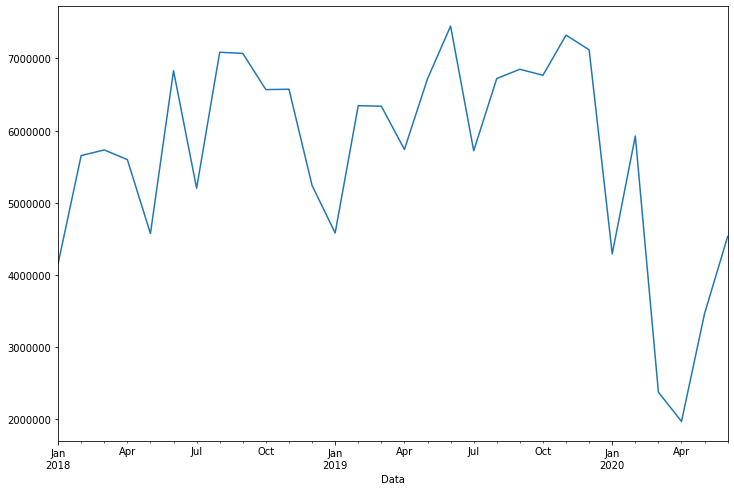

In [13]:
fig = plt.figure(figsize=(12,8))
df['Fat_Liq'].plot()

fig.savefig('Fat_Liq.svg', format='svg', dpi=1200)

In [14]:
timeseries = df['Fat_Liq']

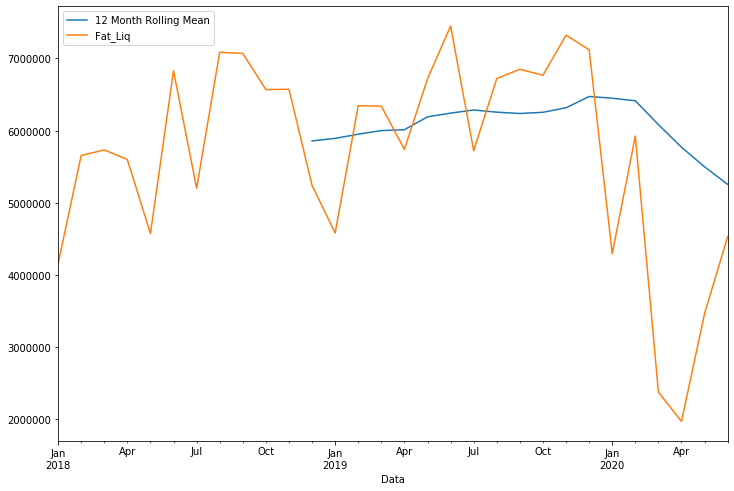

In [15]:
fig = plt.figure(figsize=(12,8))
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
#timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()
fig.savefig('Fat_Liq_media_movel.svg', format='svg', dpi=1200)

C:\Users\henrique\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


<Figure size 432x288 with 0 Axes>

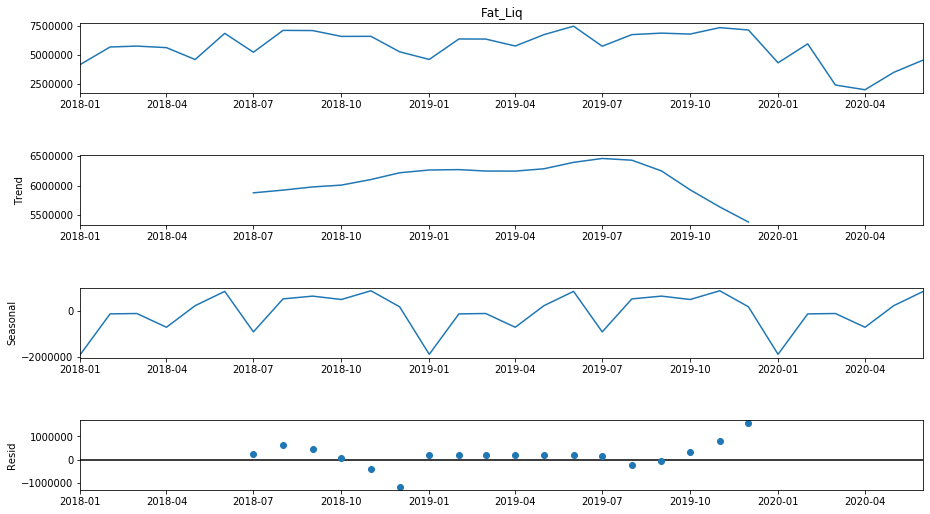

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Fat_Liq'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

fig.savefig('seasonal_decompose.svg', format='svg', dpi=1200)

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
result = adfuller(df['Fat_Liq'])

In [19]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [20]:
adf_check(df['Fat_Liq'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.940040500795944
p-value : 0.04088603988766389
#Lags Used : 0
Number of Observations Used : 29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [21]:
df['Fat_Liq_First_Difference'] = df['Fat_Liq'] - df['Fat_Liq'].shift(1)

In [22]:
adf_check(df['Fat_Liq_First_Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -7.654092619005382
p-value : 1.7577173041229737e-11
#Lags Used : 0
Number of Observations Used : 28
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

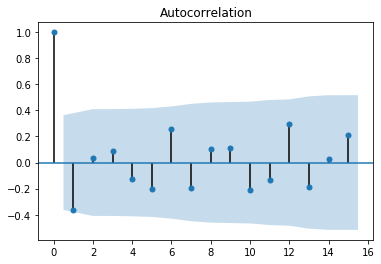

In [24]:
fig_first = plot_acf(df["Fat_Liq_First_Difference"].dropna())

In [25]:
df['Fat_Liq_Seasonal_Difference'] = df['Fat_Liq'] - df['Fat_Liq'].shift(12)
adf_check(df['Fat_Liq_First_Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -7.654092619005382
p-value : 1.7577173041229737e-11
#Lags Used : 0
Number of Observations Used : 28
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


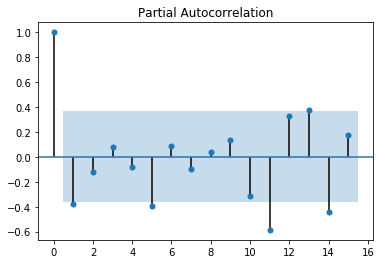

In [26]:
result = plot_pacf(df["Fat_Liq_First_Difference"].dropna())

In [27]:
# For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [28]:
# We have seasonal data!
model = sm.tsa.statespace.SARIMAX(df['Fat_Liq'],order=(0,1,0), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

C:\Users\henrique\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\henrique\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\henrique\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


                                      SARIMAX Results                                       
Dep. Variable:                              Fat_Liq   No. Observations:                   30
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -262.489
Date:                              Wed, 29 Jul 2020   AIC                            530.978
Time:                                      15:27:23   BIC                            533.478
Sample:                                  01-01-2018   HQIC                           531.227
                                       - 06-01-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.7982      0.321     -2.485      0.013      -1.428      -0.169
ma.S.L12       0.95

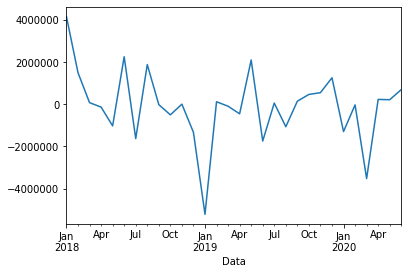

In [29]:
results.resid.plot()

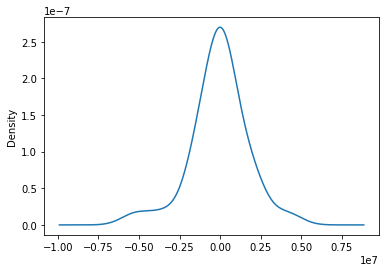

In [30]:
results.resid.plot(kind='kde')

In [31]:
from pandas.tseries.offsets import DateOffset

In [32]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,24) ]

In [33]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [34]:
future_df = pd.concat([df,future_dates_df])

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

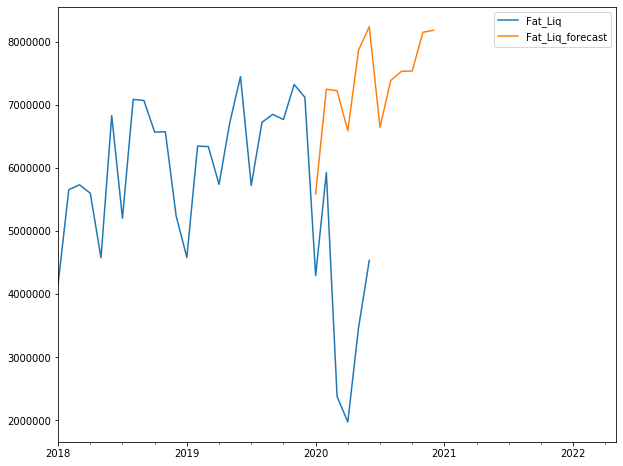

In [41]:
future_df['Fat_Liq_forecast'] = results.predict(start = 24, end= 35, dynamic= True)  
fig = future_df[['Fat_Liq','Fat_Liq_forecast']].plot(figsize=(10,8))

fig.savefig('forecast.svg', format='svg', dpi=1200)